In [54]:
import os
import json
import numpy as np
import sklearn.feature_extraction.text as text
import nltk
from nltk.corpus import stopwords
import string
import re
#import collections
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /Users/luca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/luca/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
CORPUS_PATH = os.path.join('RoyalCommission', 'r3')

In [4]:
CORPUS_PATH

'RoyalCommission/r3'

In [5]:
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])

In [6]:
filenames[1:]

['RoyalCommission/r3/r3_1.json',
 'RoyalCommission/r3/r3_2.json',
 'RoyalCommission/r3/r3_3.json',
 'RoyalCommission/r3/r3_4.json',
 'RoyalCommission/r3/r3_5.json']

In [7]:
docu_dict = {}
for j in filenames[1:] :
    with open(j,'r') as load_f:
        load_dict = json.load(load_f)
    for i in range(0,len(load_dict['result']['docs'])):
        docu_dict[load_dict['result']['docs'][i]['title']] = load_dict['result']['docs'][i]['content']

In [8]:
def SentenceToken(raw):#setencetokenize
    sent_tokenizer=nltk.data.load('tokenizers/punkt/english.pickle')
    
    return  sent_tokenizer.tokenize(raw)

In [9]:
def RemovePunct(line): #remove punctuation
    #identify = str.maketrans('', '')
    delEStr = string.punctuation +string.digits  #symbols
#     print(len(line))
#     print(type(line))
    CleanLine = []
    for i in range(0,len(line)):
        temp = []
        
        temp1 = ( re.sub(r'http://[a-zA-Z0-9.?/&=:]*','',line[i]))
        temp.append(re.sub(r'[^a-zA-Z]',' ',temp1))
        strtemp = ' '.join(temp)
        CleanLine.append(strtemp)

    return CleanLine

In [55]:
def RemoveStop(Sentence):
    cleanWords=[]
    noise = ['www','com','mr','pm','ms','year']
    for i in range(0,len(Sentence)):
        wordsInStr = nltk.word_tokenize(Sentence[i])
        temp = ([lemmatizer.lemmatize(w.lower()) for w in wordsInStr if w.lower() not in stopwords.words('english') ])
        
        cleanWords.append(' '.join(abc for abc in temp if abc not in noise))
    return cleanWords

In [56]:
# def WordToken(sentence):#
#     word=[]
#     for i in range(0,len(sentence)):

#             wordsInStr = nltk.word_tokenize(sentence[i])
#             for j in wordsInStr:
#                 word.append(j)

#     return word

In [57]:
DocumentsContent = []
DocumentsName = []
for k,v in docu_dict.items():
    a = (RemoveStop(RemovePunct(SentenceToken(v))))
#     print('=======')
#     print(v)
    #print((SentenceToken(v)))
    DocumentsContent.append(' '.join(a))
    DocumentsName.append(k)

In [58]:
import sklearn.feature_extraction.text as text
vectorizer = text.CountVectorizer(input='content', stop_words='english', min_df=20)

In [59]:
dtm = vectorizer.fit_transform(DocumentsContent).toarray()

In [60]:
vocab = np.array(vectorizer.get_feature_names())

In [61]:
dtm.shape

(646, 1526)

In [74]:
from sklearn import decomposition
num_topics = 10
num_top_words = 10
clf = decomposition.NMF(n_components=num_topics, random_state=1)

In [75]:
doctopic = clf.fit_transform(dtm)

In [76]:
topic_words = []
for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [78]:
topic_words

[['bank',
  'said',
  'loan',
  'commission',
  'royal',
  'bankwest',
  'customer',
  'business',
  'banking',
  'cba'],
 ['tax',
  'australia',
  'australian',
  'budget',
  'au',
  'rate',
  'government',
  'cut',
  'new',
  'policy'],
 ['financial',
  'adviser',
  'commission',
  'client',
  'advice',
  'royal',
  'say',
  'product',
  'industry',
  'need'],
 ['management',
  'access',
  'service',
  'corporation',
  'security',
  'solution',
  'platform',
  'user',
  'new',
  'australia'],
 ['loan',
  'broker',
  'market',
  'home',
  'mortgage',
  'commercial',
  'property',
  'lender',
  'rate',
  'business'],
 ['fund',
  'super',
  'industry',
  'commission',
  'member',
  'superannuation',
  'fee',
  'report',
  'account',
  'retail'],
 ['asic',
  'financial',
  'power',
  'risk',
  'service',
  'entity',
  'regulation',
  'regulatory',
  'approach',
  'breach'],
 ['business',
  'small',
  'australia',
  'bank',
  'new',
  'company',
  'firm',
  'service',
  'say',
  'tax'],
 

In [66]:
doctopic = doctopic / np.sum(doctopic, axis=1, keepdims=True)

In [67]:
title_names = np.asarray(DocumentsName)

In [68]:
doctopic_orig = doctopic.copy()

In [69]:
num_groups = len(set(title_names))

In [70]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [71]:
for i, name in enumerate(sorted(set(title_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[title_names == name, :], axis=0)

In [72]:
doctopic = doctopic_grouped

In [73]:
doctopic_grouped.shape

(646, 10)

In [79]:
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim
from gensim import corpora,models

([<matplotlib.axis.YTick at 0x112d2cf28>,
 <a list of 646 Text yticklabel objects>)

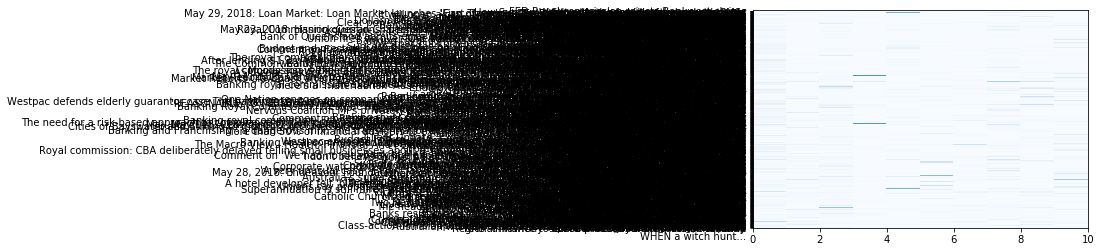

In [80]:
nmf_vis = pyLDAvis.gensim.prepare(clf, corpus_tfidf, dictionary)
pyLDAvis.display(lda_vis)

In [87]:
topic_labels = []
for i in range (0,num_topics):
    topic_labels.append(i)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

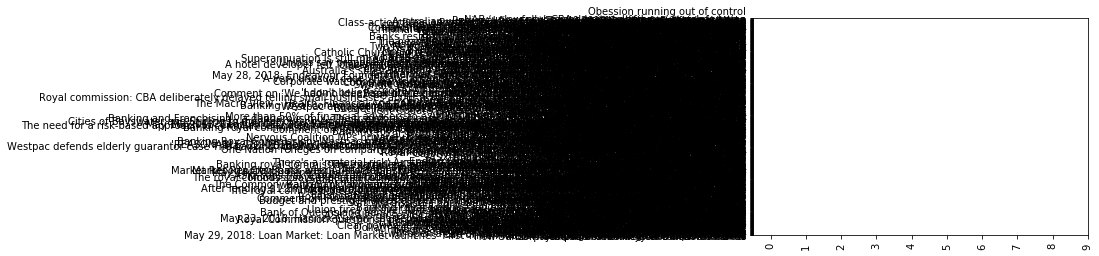

In [91]:
plt.yticks(np.arange(doctopic.shape[0])+0.5,DocumentsName )
plt.xticks(np.arange(doctopic.shape[1])+0.5, topic_labels)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)


<Figure size 432x288 with 0 Axes>

In [93]:
doctopic 

array([[0.33447103, 0.        , 0.27232355, ..., 0.54156631, 0.07973102,
        0.        ],
       [0.70133912, 0.        , 0.12864646, ..., 0.28548146, 0.07292874,
        0.        ],
       [0.40308161, 0.        , 0.62284159, ..., 0.08809939, 0.08149041,
        0.        ],
       ...,
       [0.03781531, 0.        , 0.03342853, ..., 0.        , 0.00691985,
        0.        ],
       [0.04231608, 0.00787473, 0.03071771, ..., 0.0008057 , 0.01007653,
        0.        ],
       [0.56930858, 0.        , 0.29499934, ..., 0.1493061 , 0.        ,
        0.        ]])

In [101]:
my_words = []
for i in topic_words:
    my_words.append(' '.join(i))
print(my_words)

['bank said loan commission royal bankwest customer business banking cba', 'tax australia australian budget au rate government cut new policy', 'financial adviser commission client advice royal say product industry need', 'management access service corporation security solution platform user new australia', 'loan broker market home mortgage commercial property lender rate business', 'fund super industry commission member superannuation fee report account retail', 'asic financial power risk service entity regulation regulatory approach breach', 'business small australia bank new company firm service say tax', 'people disability director community service organisation support australia board government', 'cent bond market price share growth investor investment company risk']


In [102]:
import pandas as pd
finalTable = pd.DataFrame(my_words,index = topic_labels,columns=['topic words'])


finalTable.columns=['Topic words']
finalTable

,Topic words
0,bank said loan commission royal bankwest custo...
1,tax australia australian budget au rate govern...
2,financial adviser commission client advice roy...
3,management access service corporation security...
4,loan broker market home mortgage commercial pr...
5,fund super industry commission member superann...
6,asic financial power risk service entity regul...
7,business small australia bank new company firm...
8,people disability director community service o...
9,cent bond market price share growth investor i...


In [105]:
finalTable = pd.DataFrame(doctopic,index =DocumentsName, columns=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9'])



finalTable

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
NAB ‘unlawfully’ seized proceeds from customer’s home,0.334471,0.000000,0.272324,0.065710,0.075206,0.000000,0.104395,0.541566,0.079731,0.000000
CBA admits to ‘failures’ in risk function,0.701339,0.000000,0.128646,0.055154,0.000000,0.000000,0.349285,0.285481,0.072929,0.000000
Regional finance to come under royal commission scrutiny,0.403082,0.000000,0.622842,0.083243,0.000000,0.000000,0.254025,0.088099,0.081490,0.000000
Top 40: tax flipside of the big bad banks,0.336500,1.178762,0.000000,0.000000,0.000000,0.018672,0.000000,0.057680,0.000000,0.465645
2018 Synchron Conference Wrap,0.000000,0.093323,0.477847,0.099301,0.000000,0.000000,0.004601,0.321281,0.045042,0.000000
New blow as ANZ to face cartel probe,0.382438,0.066719,0.000000,0.026970,0.000000,0.094382,0.000000,0.030018,0.000000,0.201789
FED:RC lawyers against more SME regulation,0.265877,0.000000,0.015130,0.000000,0.075395,0.000000,0.095524,0.581851,0.000000,0.000000
Australian workers’ retirement savings eroded by high super fund fees,0.144467,0.000000,0.000000,0.000000,0.000000,1.748822,0.139446,0.000000,0.000000,0.165488
Big four set to escape further regulations; Small business,0.571033,0.000000,0.007382,0.000000,0.000000,0.000000,0.059462,0.701025,0.000000,0.000000
Class-action firms oppose continuous disclosure law move; Corporate misconduct,0.185637,0.081671,0.190203,0.115385,0.000000,0.153633,0.139768,0.000000,0.281040,0.208473
